In [ ]:
#import the libarires which are necesarry
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Read the CSV file
sales_data=pd.read_csv("/content/sales_data.csv",encoding='unicode_escape')
sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
sales_data.shape

(11251, 15)

In [ ]:
#check data types and the information for each column and data types
sales_data.info()
sales_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


,0
User_ID,int64
Cust_name,object
Product_ID,object
Gender,object
Age Group,object
Age,int64
Marital_Status,int64
State,object
Zone,object
Occupation,object


In [ ]:

sales_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


**Clean the Data**

*   Handle the null values
*   Handle the missing values
*   Fill the null values for all the null containing columns
*   Map the Marital Status from 0 and 1 to Unmarried & Married


In [ ]:
sales_data.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
#cleaning the null vales
sales_data.drop(['Status','unnamed1'],inplace=True,axis=1)

In [ ]:
pd.isnull(sales_data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
#cleaning the full values in the Amount column
sales_data.fillna(value=sales_data['Amount'].mean(),inplace=True)


In [ ]:
pd.isnull(sales_data['Amount']).sum()

np.int64(0)

In [ ]:
#Mapping the marital Status values to U & M where 0=U(Unmarried) & 1=Married
sales_data['Marital_Status']=sales_data['Marital_Status'].map({0:'U',1:'M'})
sales_data.head(4)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,U,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,M,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,M,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,U,Karnataka,Southern,Construction,Auto,2,23912.0


**Exploratory Data Analysis**

In [ ]:
#count for each gender
sales_data['Gender'].value_counts()

,count
Gender,
F,7842
M,3409


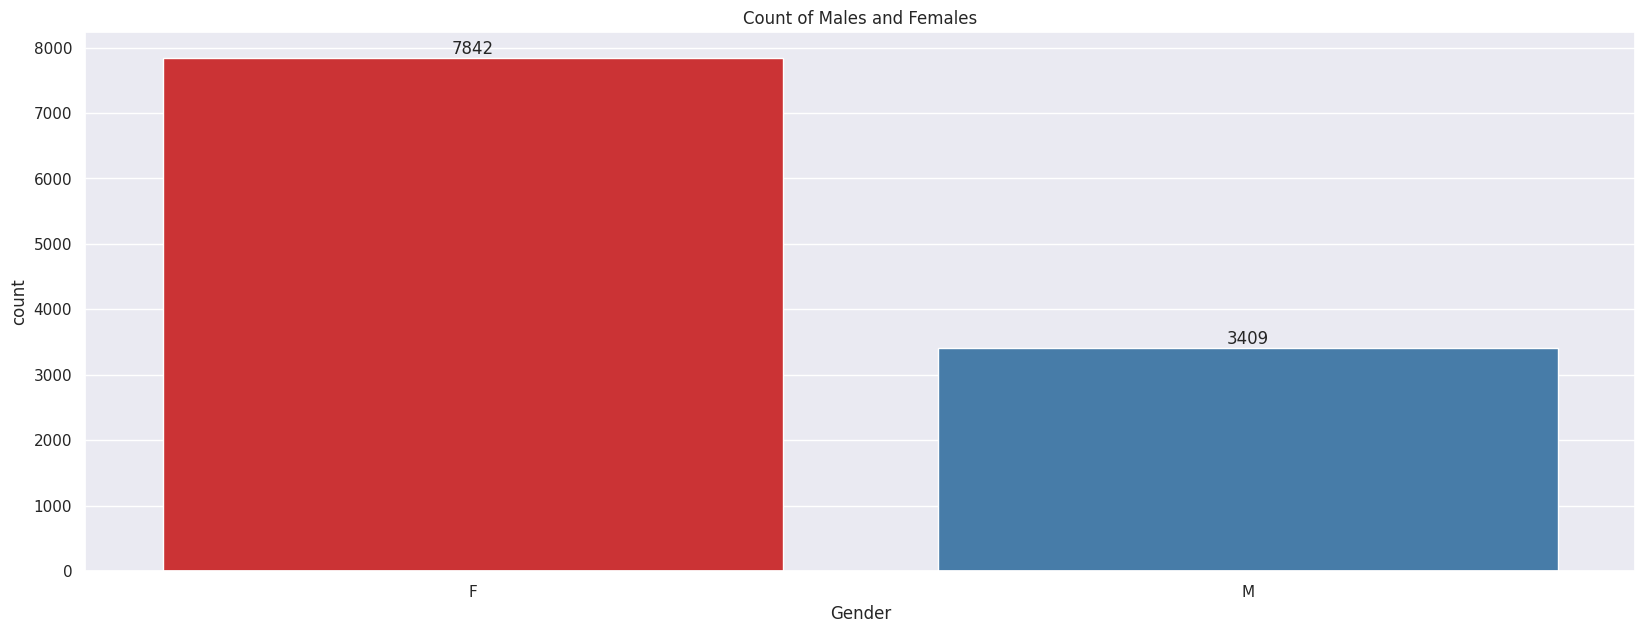

In [ ]:
#plot the graph based on count of gender
plot= sns.countplot(x= 'Gender', data= sales_data,palette='Set1')
plt.title("Count of Males and Females")
for col in plot.containers:
  plot.bar_label(col)

From the above analysis we are good to conclude that female count is greater than Male

In [ ]:
#Check the amount spent by each gender by grouping them
df= sales_data.groupby(['Gender'], as_index= False)['Amount'].sum()
df

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


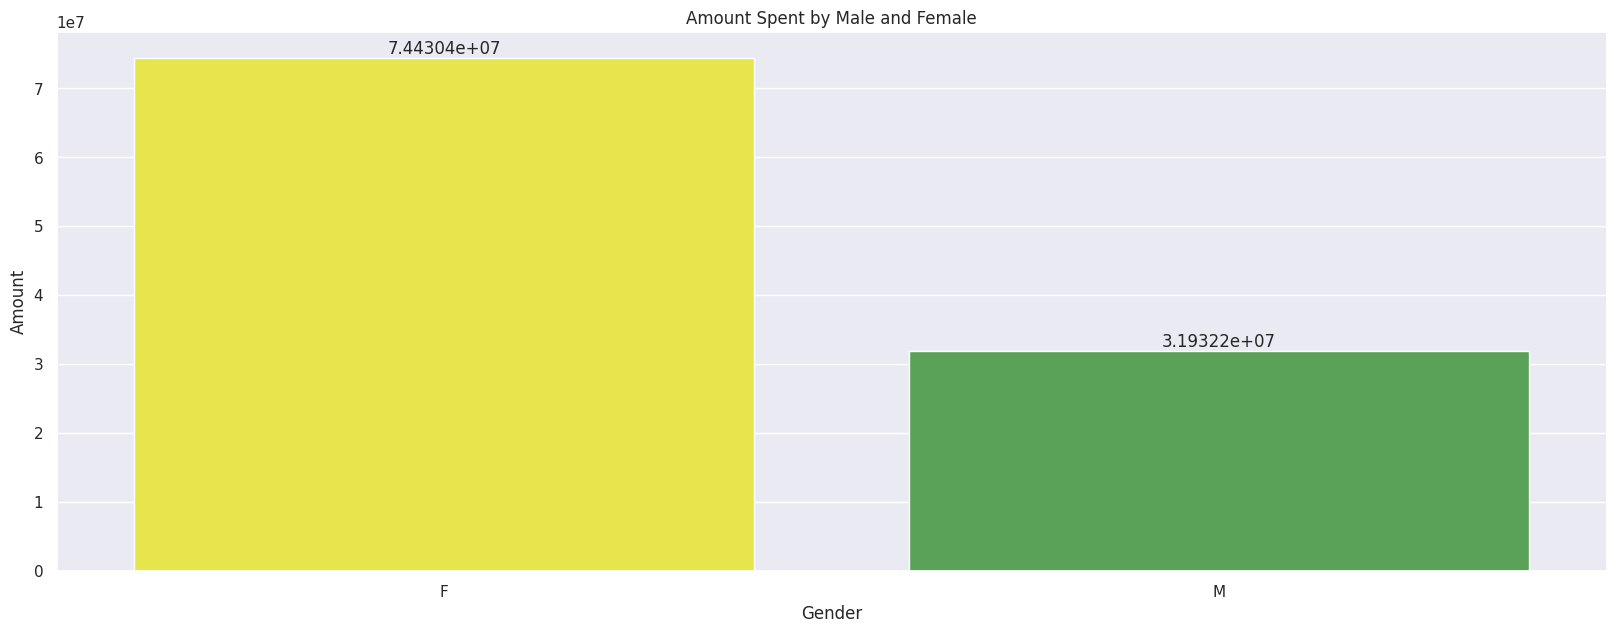

In [ ]:
#plot the countplot for each gender in which the amount spent by them
plt.title("Amount Spent by Male and Female")
plots= sns.barplot(x='Gender', y= 'Amount', data= df,palette='Set1_r')
for col in plots.containers:
  plots.bar_label(col)

Based on above analysis we are concluding that Amount spent by females are more than males


In [ ]:
#count the age values
sales_data['Age'].value_counts()

,count
Age,
30,522
26,494
28,460
29,454
31,448
...,...
82,8
70,7
92,7


In [ ]:
#count the each age group
sales_data['Age Group'].value_counts()

,count
Age Group,
26-35,4543
36-45,2286
18-25,1879
46-50,987
51-55,832
55+,428
0-17,296


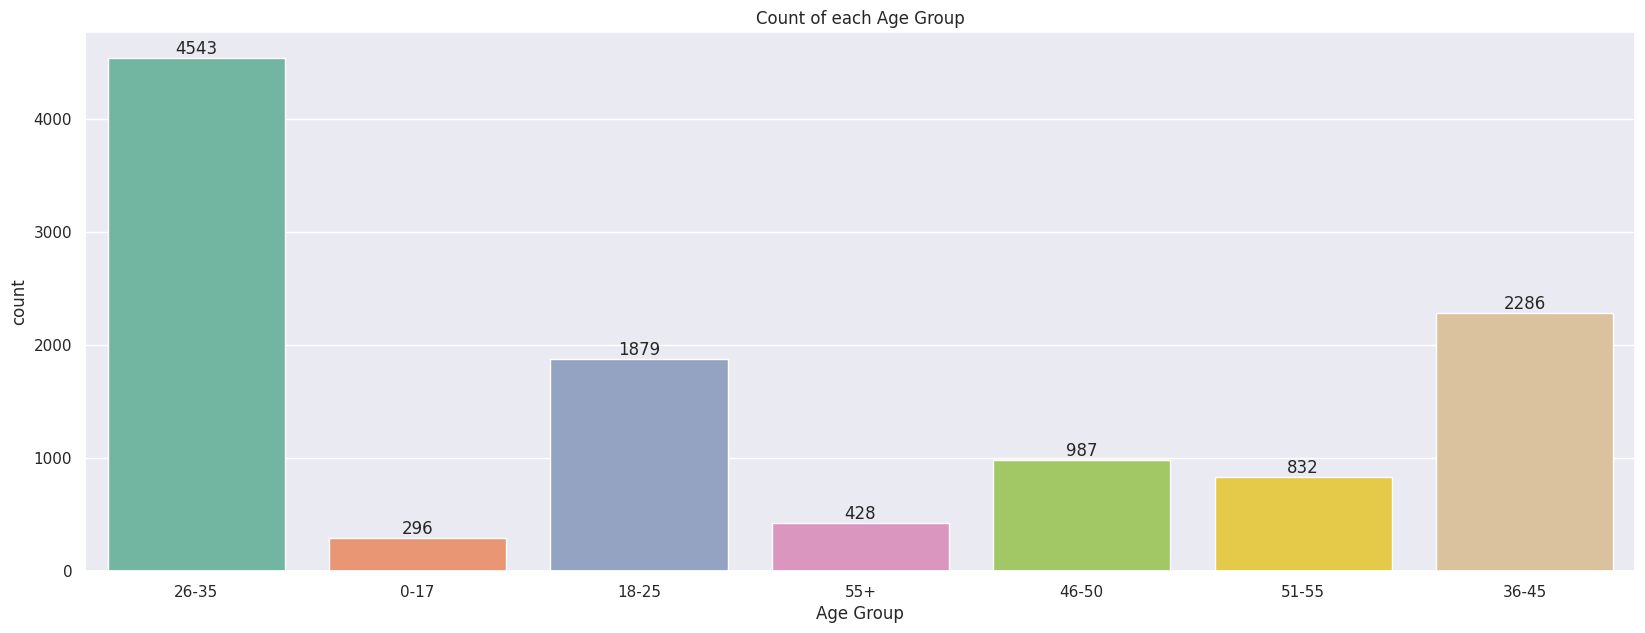

In [ ]:
#plot the countplot for each group
plots= sns.countplot(x='Age Group',data=sales_data,palette='Set2')
plt.title("Count of each Age Group")
for i in plots.containers:
  plots.bar_label(i)

Here we are analyzing that Majority of Age Group involving in shopping is between 26 to 35

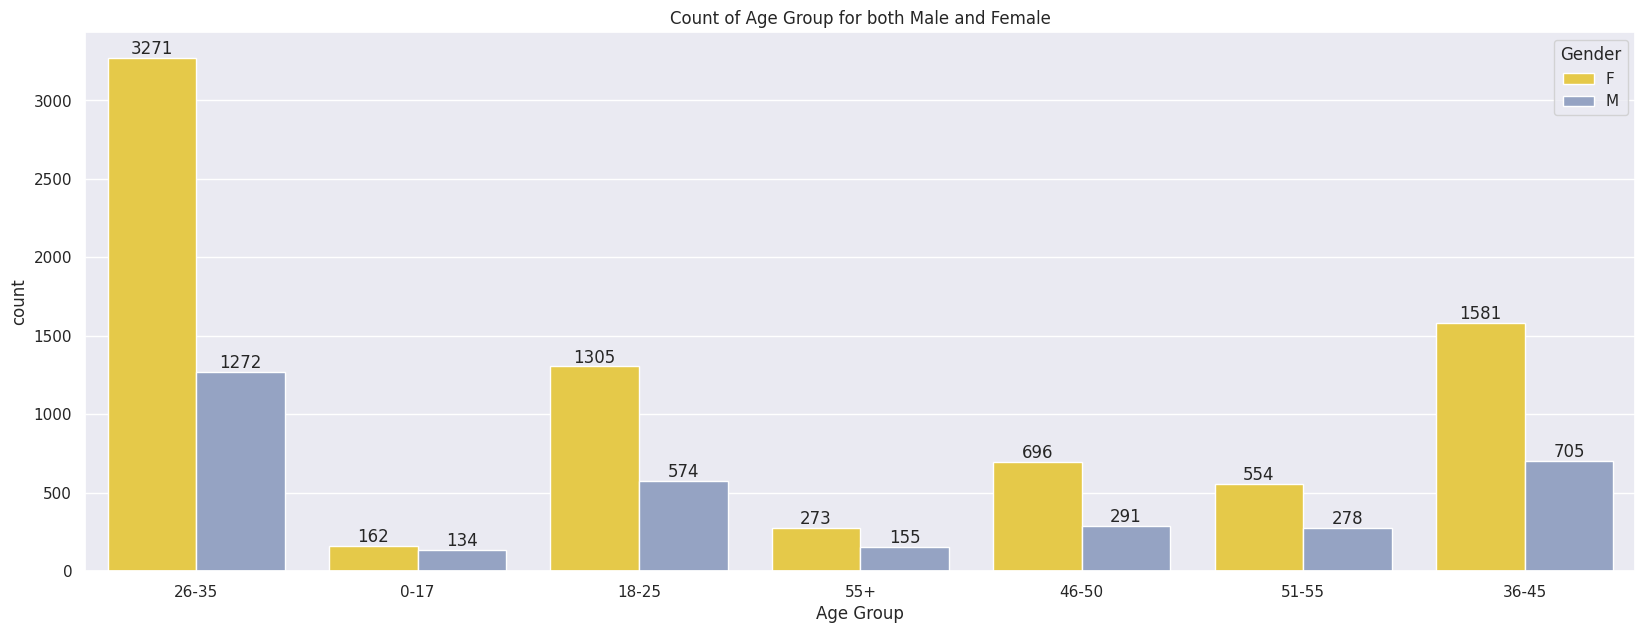

In [ ]:
#plot a countplot of each gender based on age group
plots= sns.countplot(x='Age Group',data=sales_data,palette='Set2_r',hue='Gender')
plt.title("Count of Age Group for both Male and Female")
for i in plots.containers:
  plots.bar_label(i)

From the above analysis we are concluding that female count is higher than male in all the age groups

In [ ]:
#Count of Orders of each state by grouping them
df=sales_data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(['Orders'],ascending=False)
df

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


'for i in plots.containers:\n  plots.bar_label(i)'

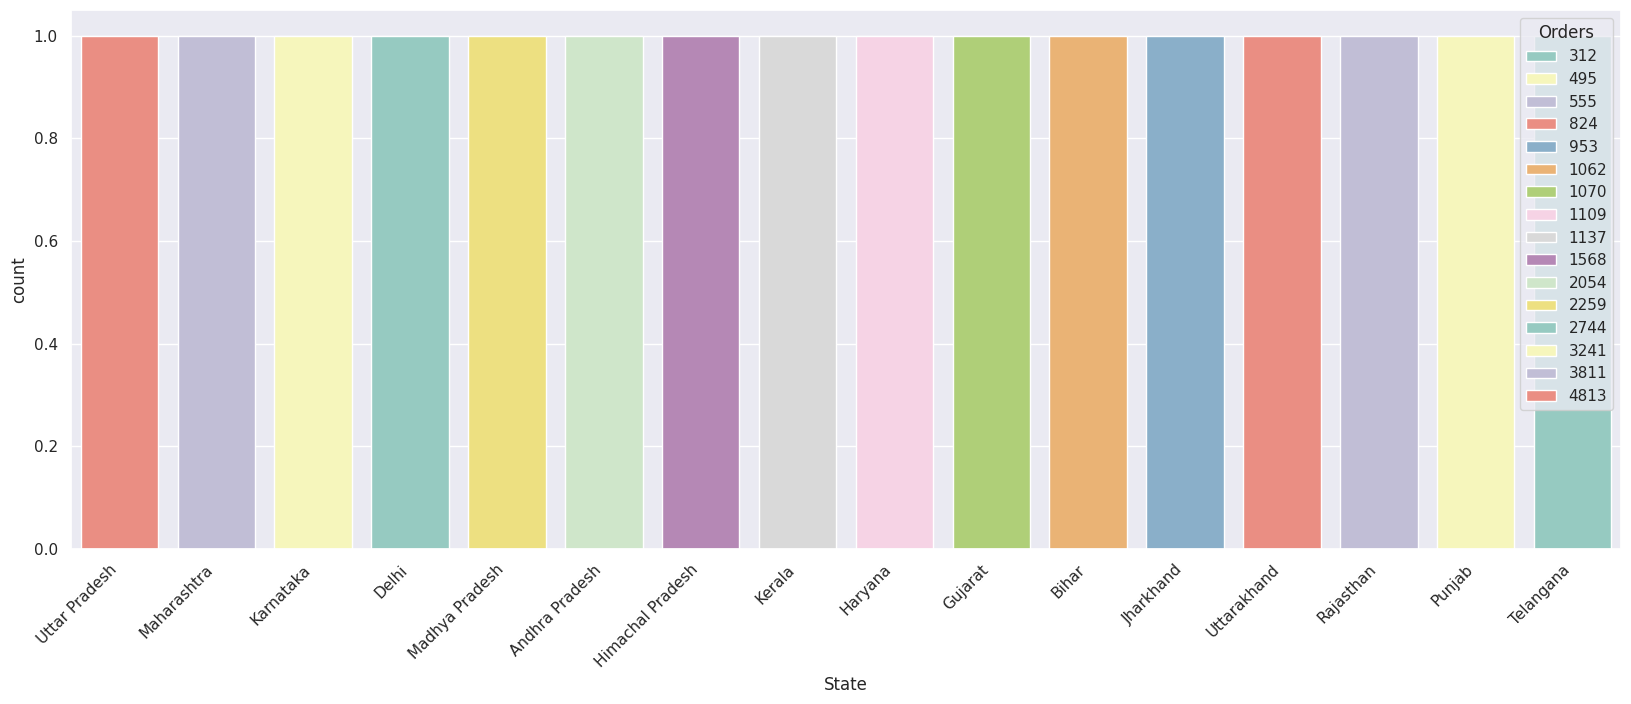

In [ ]:
#plot a countplot for each state and all the orders available
plots= sns.countplot(x='State',data=df,palette='Set3',hue='Orders')
plt.xticks(rotation=45, ha='right')

for i in plots.containers:
  plots.bar_label(i)

Then we are concluding that Uttarpradesh placed more orders than all the states followed by Maharastra using countplot along with count for each state

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

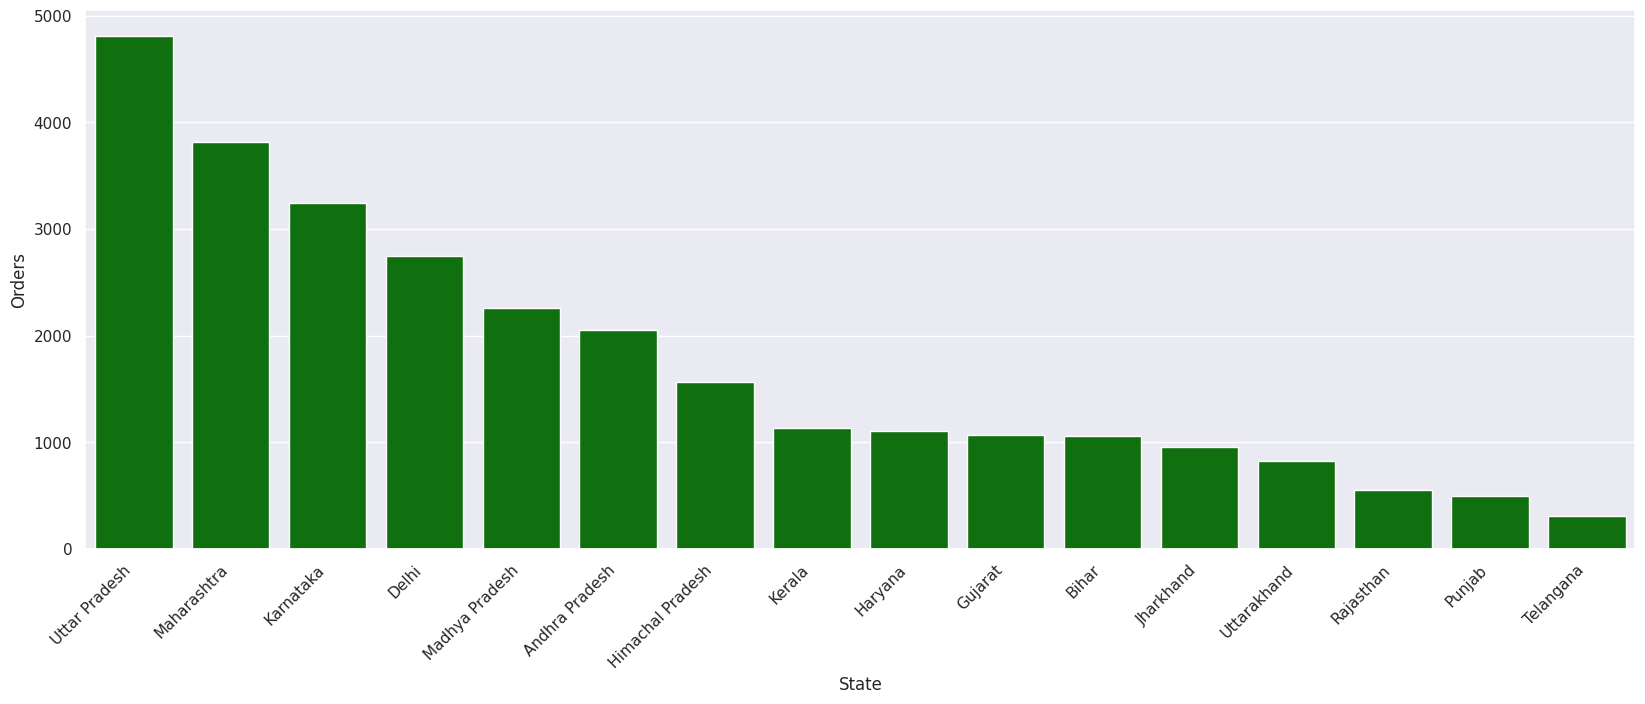

In [ ]:
#plot the barplot for each state to all the orders
sns.barplot(x='State', y= 'Orders', data=df,color='Green')
plt.xticks(rotation=45, ha='right')

Orders placed my each state using bar plot.

In [ ]:
#Amount spent by each state
df=sales_data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
df


,State,Amount
14,Uttar Pradesh,1.939388e+07
10,Maharashtra,1.443700e+07
7,Karnataka,1.353299e+07
2,Delhi,1.163218e+07
9,Madhya Pradesh,8.120049e+06
0,Andhra Pradesh,8.046601e+06
5,Himachal Pradesh,4.963368e+06
4,Haryana,4.220175e+06
1,Bihar,4.022757e+06
3,Gujarat,3.964989e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

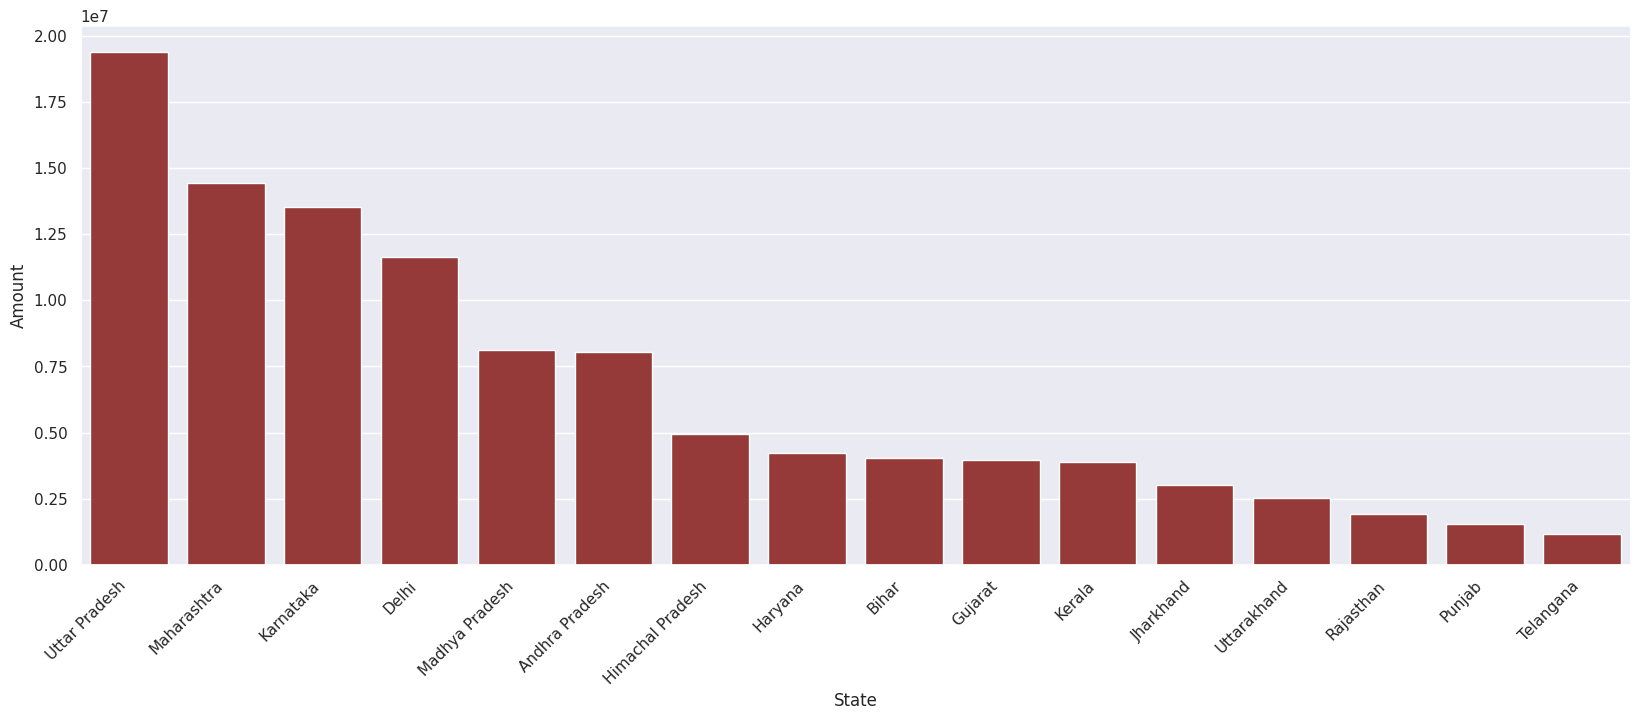

In [ ]:
#Plot the barplot for the amount spent by each state
sns.barplot(x='State', y= 'Amount', data=df,color='Brown')
plt.xticks(rotation=45, ha='right')

We are analyzing that Amount spent by each state on orders.
Based on the output we are concluding that Uttarpradesh is on top followed by Maharastra.

In [ ]:
#check the count of marital Status
sales_data['Marital_Status'].value_counts()

,count
Marital_Status,
U,6522
M,4729


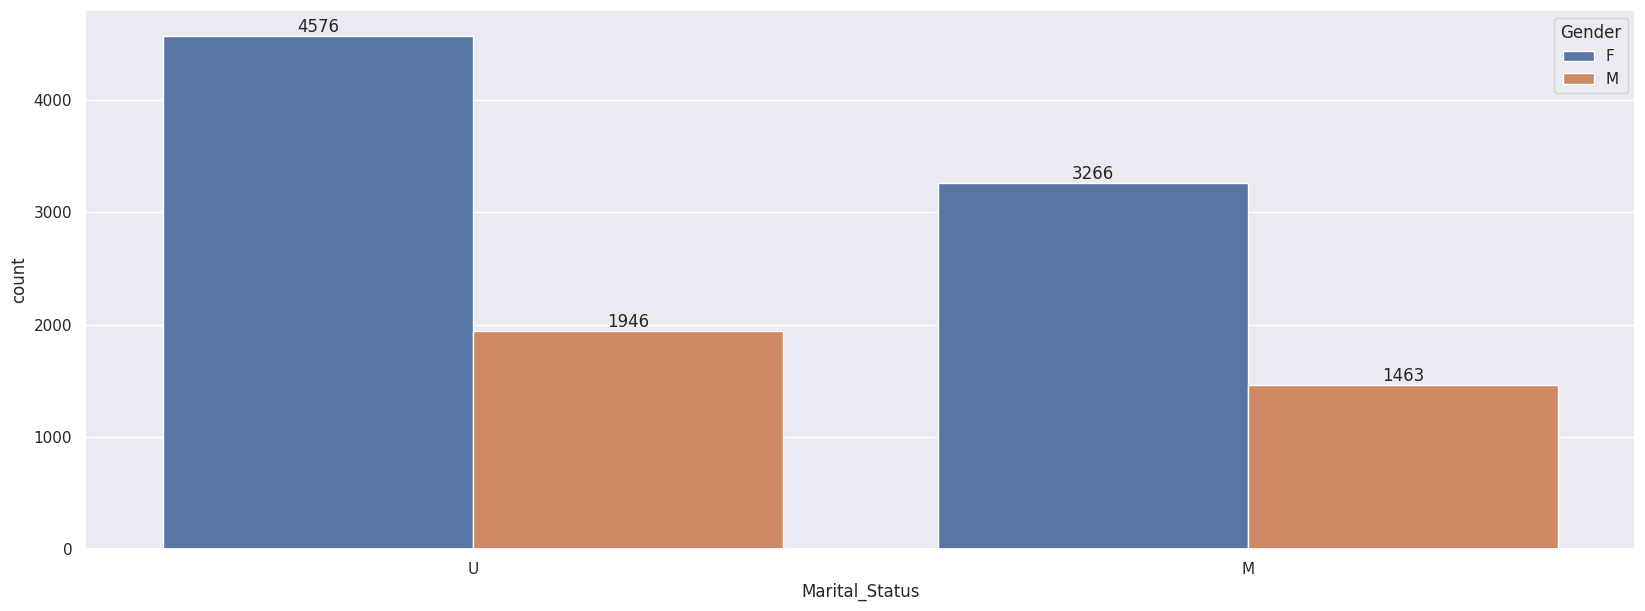

In [ ]:
#plot the countplot for marital status
plot=sns.countplot(x='Marital_Status',data=sales_data,hue='Gender')
for i in plot.containers:
  plot.bar_label(i)

We are analyzing the Marital Status for Gender.
We are concluding that in both married and unmarried female count is higher than male

In [ ]:
#Amount spent by each Occupation
df= sales_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
df

,Occupation,Amount
10,IT Sector,1.480235e+07
8,Healthcare,1.303459e+07
2,Aviation,1.260230e+07
3,Banking,1.078952e+07
7,Govt,8.517212e+06
9,Hospitality,6.395312e+06
12,Media,6.295833e+06
1,Automobile,5.378050e+06
4,Chemical,5.306890e+06
11,Lawyer,4.981665e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

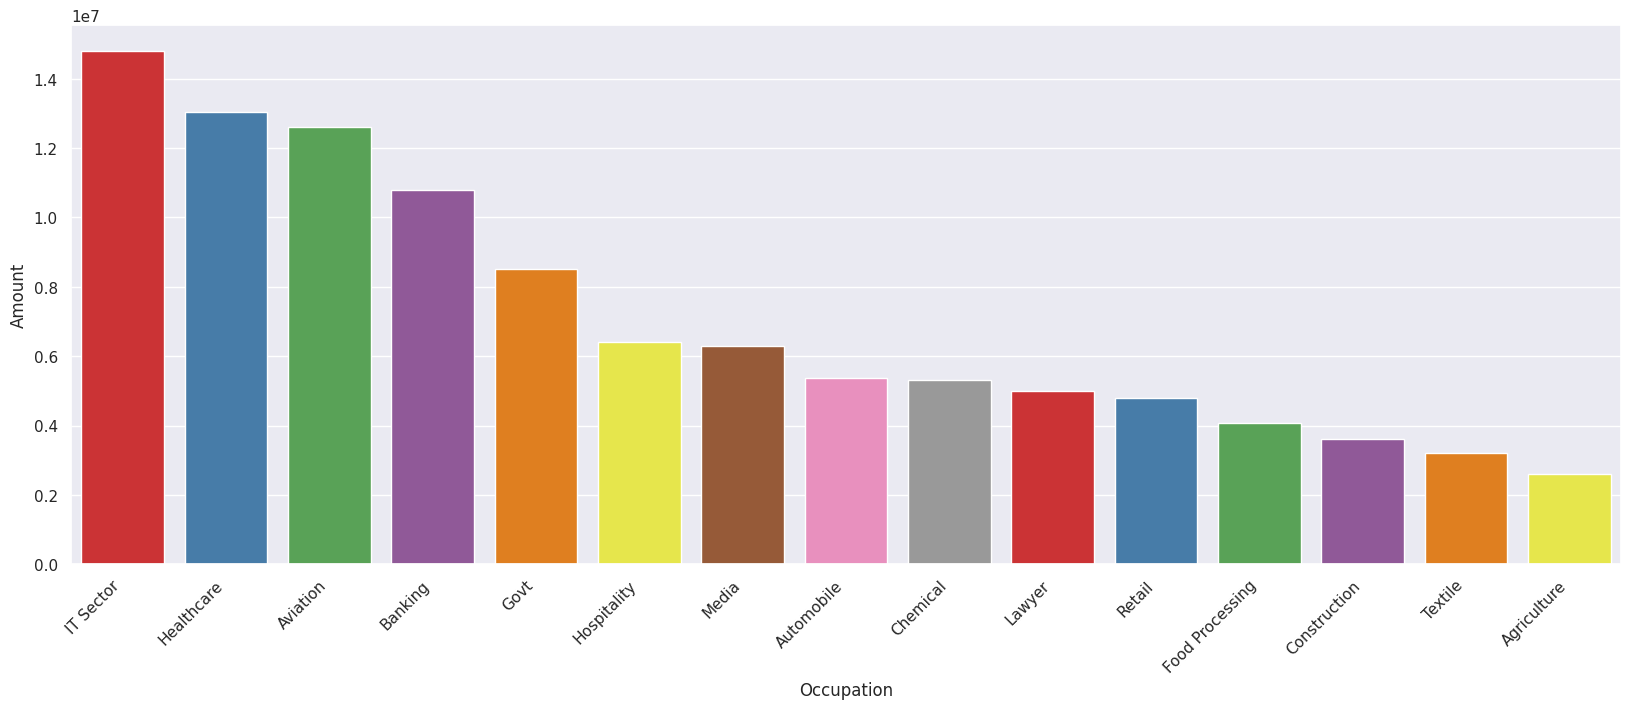

In [ ]:
#plot the Barplot for Occupation and Amount
sns.barplot(x='Occupation', y= 'Amount', data= df,palette='Set1')
plt.xticks(rotation=45, ha='right')

From the above analysis we are concluding that IT sector spending more amount than remaining occupations followed by Healthcare.

In [ ]:
#count the total orders by each product category
df= sales_data.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(['Orders'], ascending=False)
df

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6120
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2654
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,890
14,Sports Products,870
13,Pet Care,536


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Household items'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Games & Toys'),
  Text(7, 0, 'Furniture'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Pet Care'),
  Text(10, 0, 'Stationery'),
  Text(11, 0, 'Office'),
  Text(12, 0, 'Auto'),
  Text(13, 0, 'Books'),
  Text(14, 0, 'Decor'),
  Text(15, 0, 'Veterinary'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Hand & Power Tools')])

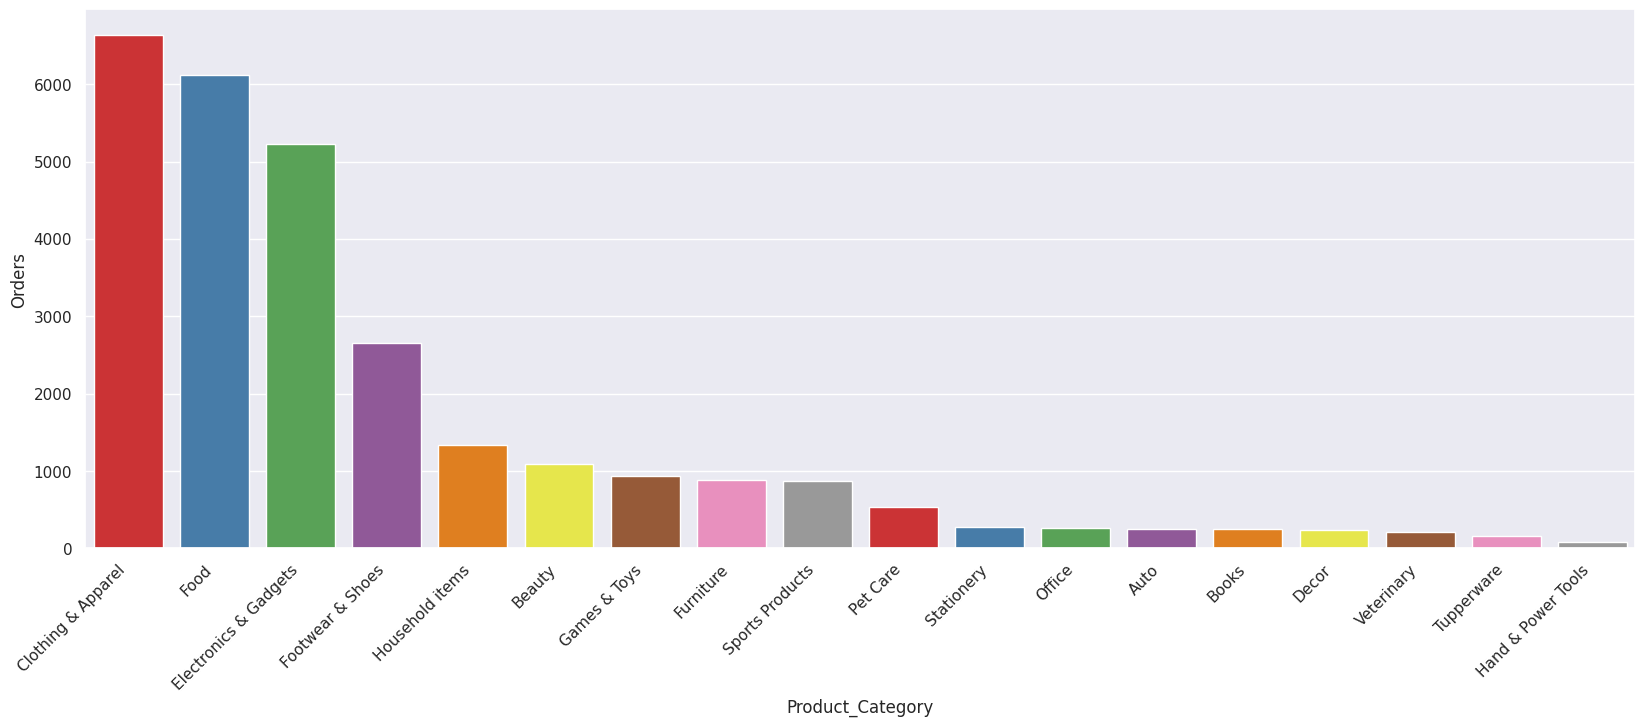

In [ ]:
#plot the barplot for each product category and orders
sns.barplot(x='Product_Category', y= 'Orders', data= df,palette='Set1')
plt.xticks(rotation=45, ha='right')

Based on the above analysis we can conclude that Clothing & apparel Product category have higher orders than remaining followed by Food.

In [ ]:
#Amount spent by each product category
df= sales_data.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
df

,Product_Category,Amount
6,Food,3.396224e+07
3,Clothing & Apparel,1.649502e+07
5,Electronics & Gadgets,1.564385e+07
7,Footwear & Shoes,1.562248e+07
8,Furniture,5.449506e+06
9,Games & Toys,4.331694e+06
14,Sports Products,3.635933e+06
0,Auto,1.986971e+06
1,Beauty,1.959484e+06
15,Stationery,1.676052e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Auto'),
  Text(8, 0, 'Beauty'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

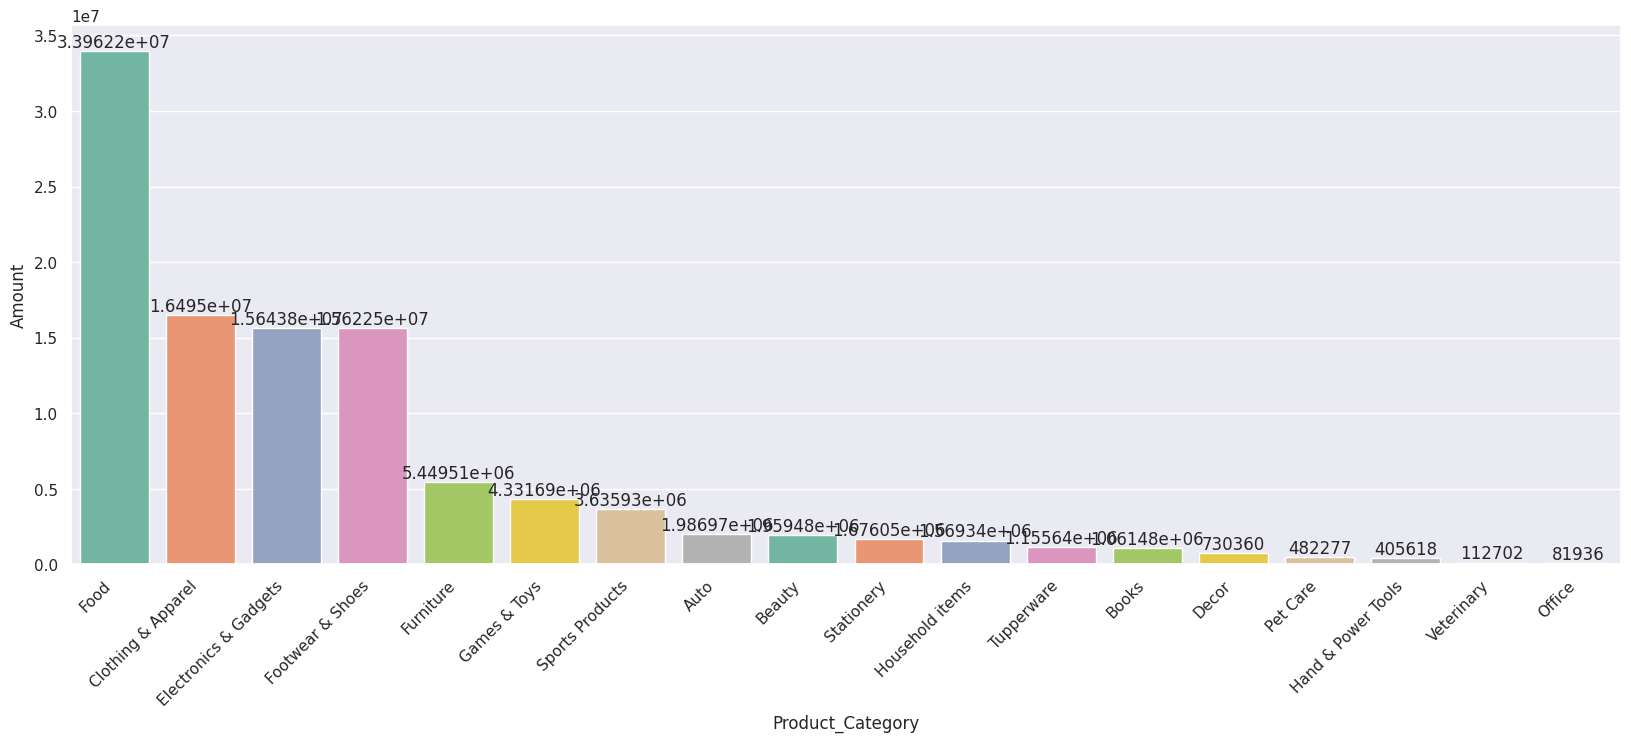

In [ ]:
#plot the barplot for amount spent by each product category
plots= sns.barplot(x= 'Product_Category', y= 'Amount', data= df,palette='Set2')
for plot in plots.containers:
    plots.bar_label(plot)
plt.xticks(rotation=45, ha='right')

Based on above Analysis Food product category spending more amount than  followed by Clothing.

**Conclusion::**

  After Analyzing the entire dataset we are concluding that Unmarried Female with agegroup from 26 to 30 spending more amount on Food,Clothing & electronics Gadgets from the State of Uttar Pradesh.